# Activity #2 (5 marks)


Class Activity: Analyzing NYC Hyperlocal Air Quality Data with Spatial Join

# Objective:
- This activity reinforces concepts from Chapters 6 (Tables), 7 (Visualization), 8 (Functions and Tables), and 9 (Randomness). Students will analyze NYC hyperlocal air quality data using Python in a Jupyter Notebook (Google Colab). The focus will be on leveraging the Table abstraction wherever possible. Additionally, students will use spatial join techniques to combine air quality sensor readings with geographic data.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

import necessary libraries

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [4]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [ ]:
#pm10_data.dtypes

### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [5]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-5-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [ ]:
#merged_data.dtypes

In [6]:
pollution_data = merged_data[['pm10','neighborhood']]

In [7]:
pollution_data.shape[0]

118495

In [8]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [9]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [10]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [11]:
pollution_data['pm10'].min()

0.0

In [12]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [13]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [14]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook. Each task is worth 1 mark , for a total of 5 marks . Use the Table abstraction wherever possible.

# Tasks

###Task 1: Explore the Joined Data Using Tables (1 Mark)
- Display the first 5 rows of the joined_table using .show().
- Print the number of rows and columns in the table.
- Identify any missing values in the table and handle them appropriately (e.g., drop rows with missing values or fill them with a default value).

In [15]:
joined_table.show(5)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park
0.76,Bronx Park
47.36,Bronx Park
6.18,Bronx Park


In [16]:
print(joined_table.num_rows, joined_table.num_columns)

118495 2


In [28]:
missing_values = joined_table.where('pm10', are.equal_to(None))
print("Missing values are " , missing_values)
clean_table = joined_table.where('pm10', are.not_equal_to(None))
print("Clean table is " , clean_table)

Missing values are  pm10 | neighborhood
Clean table is  pm10 | neighborhood


# Task 2: Create Summary Statistics Using Table Operations (1 Mark)

- Compute summary statistics (mean, median, min, max) for the attributes temperature, humidity, and pm25 using table operations like .column() and .apply().
- Group the data by borough and calculate the average pm25 levels for each borough using .group() or .pivot().
- Display the results in a new table.

In [45]:
##Compute summary statistics (mean, median, min, max) for the attributes temperature, humidity, and pm25 using table operations like .column() and .apply().

selected_columns = merged_data[['temperature', 'humidity', 'pm25']]
joined_table = Table().from_df(selected_columns)

# Compute statistics using the selected columns
mean_values = np.mean(joined_table.column('temperature')), np.mean(joined_table.column('humidity')), np.mean(joined_table.column('pm25'))  # Use np.mean()
median_values = np.median(joined_table.column('temperature')), np.median(joined_table.column('humidity')), np.median(joined_table.column('pm25'))  # Use np.median()
min_values = np.min(joined_table.column('temperature')), np.min(joined_table.column('humidity')), np.min(joined_table.column('pm25'))      # Use np.min()
max_values = np.max(joined_table.column('temperature')), np.max(joined_table.column('humidity')), np.max(joined_table.column('pm25'))      # Use np.max()

#table format
summary_table = Table().with_columns(
    "Statistic", ["Mean", "Median", "Min", "Max"],
    "Temperature", [mean_values[0], median_values[0], min_values[0], max_values[0]],
    "Humidity", [mean_values[1], median_values[1], min_values[1], max_values[1]],
    "pm25", [mean_values[2], median_values[2], min_values[2], max_values[2]]
)

# Display the table
summary_table.show()

Statistic,Temperature,Humidity,pm25
Mean,8.24158,50.1549,7.37452
Median,7.2,46.2,3.02
Min,-7.9,0,0
Max,10471,104.2,3267.02


In [50]:
#Group the data by borough and calculate the average pm25 levels for each borough using .group() or .pivot().
avg_pm25_by_borough = merged_data[['borough', 'pm25']]
newTable = Table().from_df(avg_pm25_by_borough)
avg_pm25_by_borough = newTable.group('borough', np.mean)
avg_pm25_by_borough.show()

borough,pm25 mean
Bronx,7.795
Brooklyn,1.99695
Manhattan,2.37332
Queens,2.07253


# Task 3: Visualize the Data Using Table-Based Plots (1 Mark)

- Create a bar chart showing the average pm25 levels for each borough using .barh().
- Create a scatter plot to visualize the relationship between temperature and pm25 using .scatter(). Add appropriate labels and a title to the plot.
- Create a histogram of humidity values across all neighborhoods using .hist().

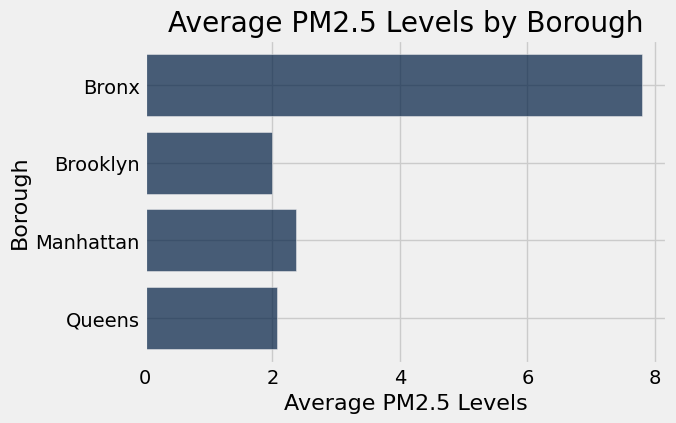

In [51]:
#Create a bar chart showing the average pm25 levels for each borough using .barh().
avg_pm25_by_borough.barh('borough', 'pm25 mean')
plt.xlabel('Average PM2.5 Levels')
plt.ylabel('Borough')
plt.title('Average PM2.5 Levels by Borough')
plt.show()


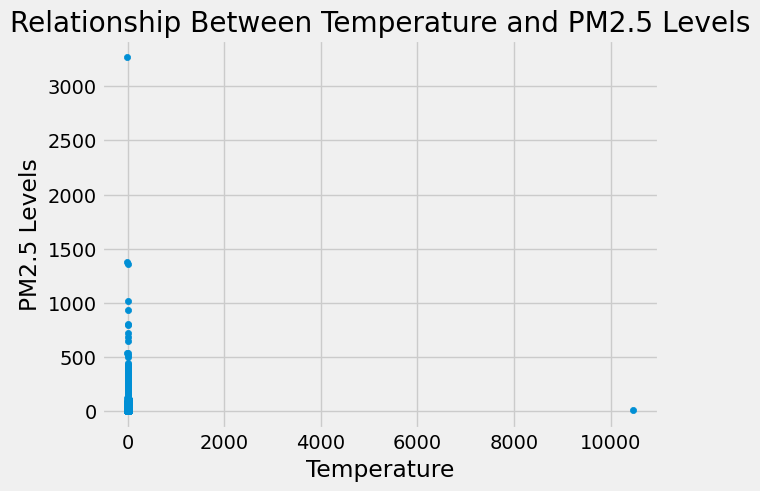

In [56]:
# Create a scatter plot to visualize the relationship between temperature and pm25 using .scatter(). Add appropriate labels and a title to the plot.
# WITH OUTLIERS
merged_data.plot.scatter(x='temperature',y='pm25')
plt.xlabel('Temperature')
plt.ylabel('PM2.5 Levels')
plt.title('Relationship Between Temperature and PM2.5 Levels')
plt.show()



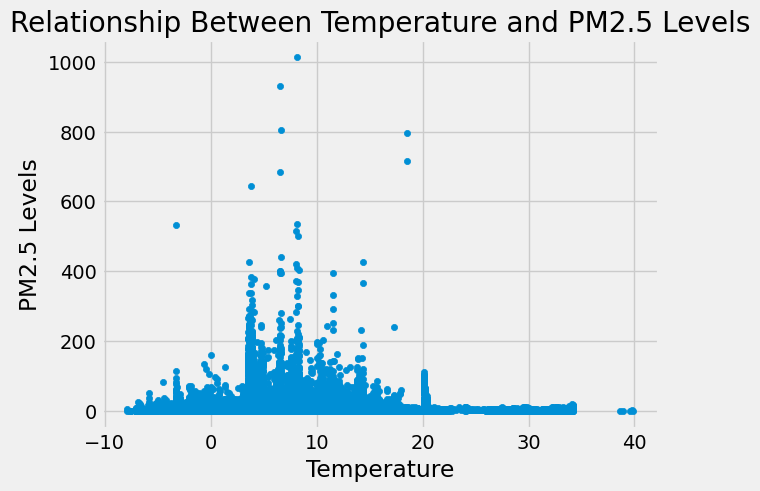

In [58]:
# Create a scatter plot to visualize the relationship between temperature and pm25 using .scatter(). Add appropriate labels and a title to the plot.
# WITHOUT OUTLIERS
filtered_data = merged_data.where((merged_data['pm25'] < 1300) & (merged_data['temperature'] < 1300))

filtered_data.plot.scatter(x='temperature',y='pm25')
plt.xlabel('Temperature')
plt.ylabel('PM2.5 Levels')
plt.title('Relationship Between Temperature and PM2.5 Levels')
plt.show()


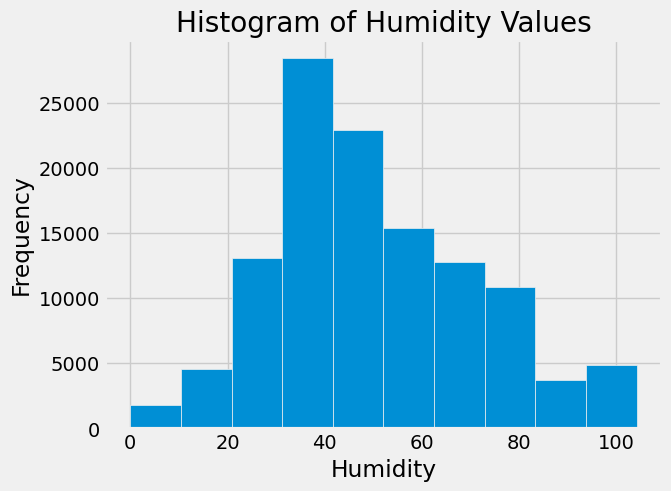

In [59]:
# Create a histogram of humidity values across all neighborhoods using .hist().
merged_data.hist(column='humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Histogram of Humidity Values')
plt.show()


# Task 4: Define and Use Functions with Tables (1 Mark)

- Write a function calculate_pm25_category(pm25) that categorizes PM2.5 levels as follows:
"Good" if pm25 < 12
"Moderate" if 12 <= pm25 < 35
"Unhealthy" if pm25 >= 35
- Apply this function to the pm25 column in the table using .apply() to create a new column called PM25_Category.
- Count the number of sensors in each PM2.5 category and display the results using .group().


In [60]:
#Write a function calculate_pm25_category(pm25) that categorizes PM2.5 levels as follows: "Good" if pm25 < 12 "Moderate" if 12 <= pm25 < 35 "Unhealthy" if pm25 >= 35

def calculate_pm25_category(pm25):
  if pm25 < 12:
    return "Good"
  elif 12 <= pm25 < 35:
    return "Moderate"
  else:
    return "Unhealthy"

In [62]:
# Apply the function to create a new column 'PM25_Category'
joined_table = joined_table.with_column(
    'PM25_Category', joined_table.apply(calculate_pm25_category, 'pm25')
)


In [63]:
# Count the number of sensors in each PM2.5 category
category_counts = joined_table.group('PM25_Category')

# Display the results
category_counts.show()

PM25_Category,count
Good,101851
Moderate,12651
Unhealthy,3993


# Task 5: Simulate Random Sampling Using Tables (1 Mark)
- Randomly sample 10% of the rows from the table without replacement using .sample().
- Calculate the mean pm25 level for the sampled data.
- Repeat the random sampling process 100 times and store the mean pm25 values from each iteration in a list.
- Create a histogram of the 100 mean pm25 values to visualize the distribution of sample means.

In [68]:
# Randomly sample 10% of the rows from the table without replacement using .sample().
num_rows_to_sample = int(joined_table.num_rows * 0.1)

# Sample the data
sampled_data = joined_table.sample(num_rows_to_sample)

# Calculate the mean pm25 level for the sampled data.
mean_pm25_sampled = np.mean(sampled_data.column('pm25'))

# Repeat the random sampling process 100 times and store the mean pm25 values from each iteration in a list.
mean_pm25_values = []
for _ in range(100):
  sampled_data = joined_table.sample(num_rows_to_sample)
  mean_pm25_values.append(np.mean(sampled_data.column('pm25')))


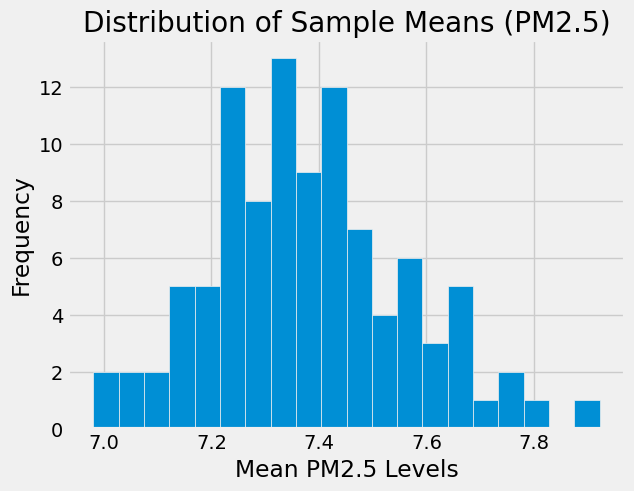

In [69]:
# Create a histogram of the 100 mean pm25 values
plt.hist(mean_pm25_values, bins=20)
plt.xlabel('Mean PM2.5 Levels')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means (PM2.5)')
plt.show()


# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
- Each task is worth 1 mark , based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 6, 7, 8, and 9 for guidance on tables, functions, visualizations, and randomness.
- Test your code frequently to ensure it runs without errors.